<a href="https://colab.research.google.com/github/RICKY-UPB/UAS-AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasifikasi Obesitas menggunakan KNN  
Dibuat oleh : RIKI SUPRIYATNA


NIM         : 312110025


UNIVERSITAS PELITA BANGSA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fdata="https://raw.githubusercontent.com/RICKY-UPB/UAS-AI/refs/heads/main/dataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


*CEK JUMLAH MALE DAN FEMALE*

In [3]:
df['Gender'].value_counts()

,count
Gender,
Male,56
Female,52


*CEK JUMLAH KLASIFIKASI BERAT BADAN*

In [4]:
df['Label'].value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


Mengubah data kategori pada kolom Gender menjadi data numerik menggunakan LabelEncoder dari scikit-learn. Nilai kategori seperti 'Male' dan 'Female' dikonversi menjadi angka (misalnya, 1 untuk 'Male' dan 0 untuk 'Female') agar dapat digunakan dalam analisis atau pembelajaran mesin.

In [5]:
# Import the necessary class
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['Gender'] = labelencoder.fit_transform(df['Gender'])

df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


Hapus Kolom ID karena tidak mempengaruhi analisi data

In [6]:
df = df.drop('ID' , axis = 1)

In [7]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese


In [8]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")


Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [9]:
#memeriksa dan menghitung jumlah nilai yang hilang (missing values) di setiap kolom DataFrame
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [10]:
from sklearn.model_selection import train_test_split
y=df.Label #Mengambil kolom Label dari DataFrame df sebagai target (variabel dependen).
X=df.drop("Label", axis=1) #Menghapus kolom Label dari DataFrame df dan menyimpan sisanya sebagai fitur (variabel independen).

Membagi dataset menjadi data pelatihan (80%) dan pengujian (20%) dengan memastikan distribusi kelas tetap sama (stratify=y). Jumlah data pelatihan dan pengujian kemudian ditampilkan.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=42)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [13]:
scl = StandardScaler()  # Inisialisasi objek StandardScaler
x_train_scl = scl.fit_transform(x_train)  # Menstandarisasi data pelatihan
x_test_scl = scl.transform(x_test)  # Menstandarisasi data pengujian

lbl_encoder = LabelEncoder()  # Inisialisasi objek LabelEncoder
y_train_enc = lbl_encoder.fit_transform(y_train)  # Mengonversi label target pada data pelatihan
y_test_enc = lbl_encoder.transform(y_test)  # Mengonversi label target pada data pengujian


In [14]:
x_train

,Age,Gender,Height,Weight,BMI
75,50,0,130,60,22.5
97,32,1,190,25,10.0
93,12,1,175,15,5.6
102,57,0,120,25,10.0
49,72,0,160,45,18.7
...,...,...,...,...,...
65,51,0,130,65,22.7
4,45,1,190,100,31.2
52,87,1,190,85,26.1
30,24,0,160,55,21.2


In [15]:
x_train_scl

array([[ 0.12277783, -1.02353263, -1.29338469,  0.        ,  0.22856582],
       [-0.58905767,  0.97700842,  0.87697791, -1.2121537 , -1.3943421 ],
       [-1.379986  ,  0.97700842,  0.33438726, -1.55848333, -1.96560569],
       [ 0.39960274, -1.02353263, -1.65511179, -1.2121537 , -1.3943421 ],
       [ 0.99279899, -1.02353263, -0.20820339, -0.51949444, -0.26479819],
       [ 0.83461333,  0.97700842,  0.33438726,  0.69265926,  0.5920972 ],
       [ 0.79506691,  0.97700842,  0.33438726,  0.17316481,  0.25453235],
       [-1.1427075 ,  0.97700842,  0.33438726,  0.34632963,  0.34541519],
       [-0.39132559, -1.02353263, -0.93165759, -1.2121537 , -1.3943421 ],
       [-0.07495425,  0.97700842,  1.23870501,  0.51949444,  0.4492813 ],
       [ 0.63688124, -1.02353263, -1.65511179, -1.03898889, -0.96589441],
       [ 1.42780957, -1.02353263, -0.56993049, -0.34632963, -0.09601576],
       [-0.74724334,  0.97700842,  0.51525081,  0.69265926,  0.5920972 ],
       [-0.35177917,  0.97700842,  0.8

In [16]:
y_train

,Label
75,Normal Weight
97,Underweight
93,Underweight
102,Underweight
49,Underweight
...,...
65,Normal Weight
4,Obese
52,Overweight
30,Normal Weight


In [17]:
y_train_enc

array([0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 2, 0, 3, 1, 3, 3, 2, 3, 3,
       3, 2, 1, 3, 3, 0, 0, 1, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 2, 1, 2, 3,
       2, 3, 3, 3, 1, 0, 3, 3, 2, 3, 1, 3, 0, 2, 1, 3, 0, 0, 1, 2, 0, 3,
       0, 0, 2, 3, 2, 2, 2, 3, 0, 2, 3, 2, 0, 3, 3, 0, 1, 2, 0, 1])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

Model KNN untuk memprediksi data uji (x_test_scl) dan menghitung akurasi prediksi dibandingkan dengan label asli (y_test_enc) menggunakan fungsi accuracy_score. Hasil akurasi ditampilkan dengan format dua desimal.

In [21]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 0.95


Menghitung confusion matrix untuk membandingkan label asli (y_test_enc) dengan prediksi KNN (knn_predictions) dan memvisualisasikannya sebagai heatmap menggunakan seaborn. Confusion matrix membantu mengevaluasi performa model dengan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas

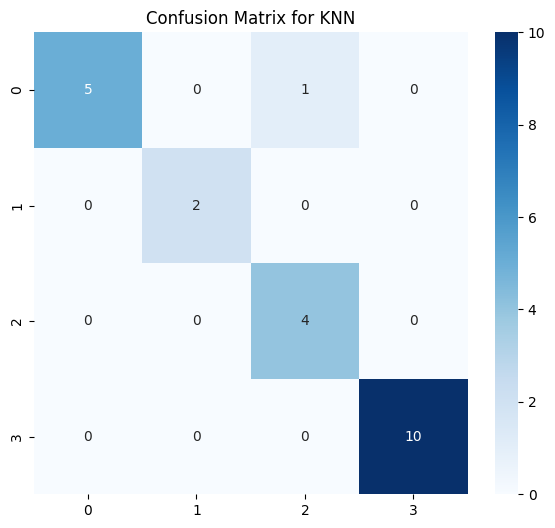

In [22]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

Melakukan 5-fold cross-validation untuk mengevaluasi performa model KNN dengan 5 tetangga terdekat menggunakan data pelatihan yang telah diskalakan (x_train_scl) dan dienkode (y_train_enc). Hasil akurasi dari setiap fold ditampilkan, dan rata-rata akurasi dari semua fold dihitung untuk memberikan gambaran konsistensi performa model.

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[0.61111111 0.64705882 0.76470588 0.76470588 0.64705882]
Rata score dengan 5 fold : 0.6869281045751634


Menguji model KNN dengan berbagai nilai n_neighbors (1 hingga 49) dan membandingkan akurasi pada data pelatihan dan pengujian untuk memilih nilai yang terbaik.

In [25]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

Membuat grafik yang membandingkan akurasi pelatihan dan pengujian untuk berbagai nilai n_neighbors pada model KNN, dengan legenda untuk membedakan kedua kurva.

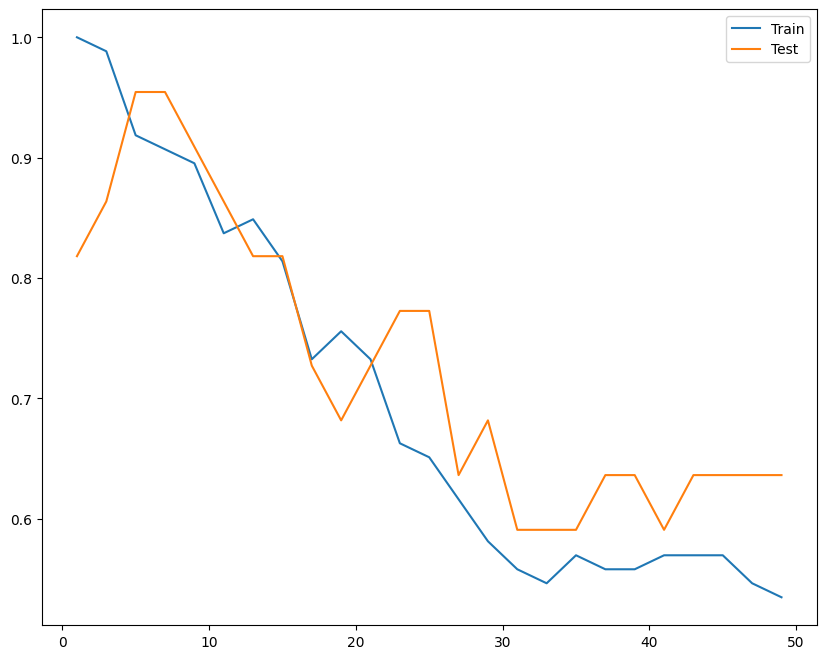

In [26]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [28]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 0.9545454545454546
K Neighboard terbaik adalah 5



---
**Exploratory Data Analis teks tebal**


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    int64  
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 5.2+ KB


In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

Categorical Column Distribution

In [ ]:
df['Gender'].value_counts()

In [ ]:
df['Label'].value_counts()

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
label_plot = sns.countplot(x='Label', data=df, palette='rocket')
plt.title('Countplot of Label')
plt.xlabel('Label')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
gender_plot = sns.countplot(x='Gender', data=df, palette='rocket')
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.legend(title='Categories', handles=[label_plot.patches[0], gender_plot.patches[0]],
           labels=['Label', 'Gender'], loc='upper right',bbox_to_anchor=(1.28, 1))

plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = ['ID', 'Age', 'Height', 'Weight', 'BMI']

sns.set(style="whitegrid", palette="rocket")


fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(15, 6 * len(numerical_cols)), sharex=False)


for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True, edgecolor='black', label=col)
    axes[i].set_title(f'Distribution of {col}')

# Add legend
axes[-1].legend(loc='upper right')


plt.subplots_adjust(hspace=0.5)

# Overall title
plt.suptitle('Distribution of Numerical Variables', y=1.0, fontsize=16)

plt.show()

In [ ]:
labelencoder = LabelEncoder()

df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Label'] = labelencoder.fit_transform(df['Label'])

df.head()

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['Label'].value_counts().plot(kind='bar')

In [ ]:
class_count = df['Label'].value_counts()

# Create a list of labels
labels = ["Normal Weight", "Overweight", "Obese", "Underweight"]

vals = class_count.values

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot the pie chart with custom colors
plt.pie(vals, labels=labels, autopct="%1.1f%%", colors=colors)

# Add a title
plt.title("Klasifikasi Obesitas")

# Show the plot
plt.show()